In [193]:
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#solved chinese display in matplotlib
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams["font.family"] = "DFKai-SB"
rcParams['axes.unicode_minus'] = False

from tqdm import tqdm_notebook,tnrange
from tqdm.autonotebook import tqdm
tqdm.pandas()

In [5]:
with open("industry_fine2medi.v02.p" ,"rb") as f:
    industry_fine2medi=pickle.load(f)

In [7]:
with open("industry_medi2fine.v02.p" ,"rb") as f:
    industry_medi2fine=pickle.load(f)

In [49]:
li_fine=[v["Name"] for v in industry_fine2medi.values()]
li_medi=[industry_medi2fine[i]["Name"] for i in industry_medi2fine]

In [126]:
print("medi length:",len(li_medi))
print("fine length:",len(li_fine))

medi length: 102
fine length: 925


## Load data

In [50]:
with open("D:news_vip_v03_sorted.p","rb") as f:
    news_vip_v03_sorted=pickle.load(f)

## Map to Middle industry

In [260]:
def maprule(x):
    if x in industry_fine2medi: return industry_fine2medi[x]['Medium_Industry_ID']
    if x in industry_medi2fine: return x
    else : return  "none"
maptoid=news_vip_v03_sorted["relateid"].progress_apply(lambda x : { maprule(k) for k in x.split(",")} - {"none"} )

In [261]:
maptocn=maptoid.progress_apply(lambda x : {industry_medi2fine[k]["Name"] for k in x} )

In [262]:
news_vip_v03_sorted["medi-industry"]=maptocn

In [ ]:
news_vip_v03_sorted=news_vip_v03_sorted.reset_index(drop=True)

In [324]:
#### added medi-industry column and save
# news_vip_v03_sorted.to_pickle("D:4.AutoencoderForArticle.Mid-Industry/news_vip_v04.p")

Index(['publishtime', 'title', 'body', 'relateid', 'guid', 'no_use', 'tags',
       'title_token', 'body_token', 'medi-industry'],
      dtype='object')

In [263]:
noindustry=0
withindustry=0
for i in maptocn:
    if len(i)==0:noindustry+=1
    if len(i)!=0:withindustry+=1
print("noindustry:",noindustry)
print("withindustry:",withindustry)
print("Total:",len(maptocn))

noindustry: 153627
withindustry: 350634
Total: 504261


#### Single label

In [264]:
d=dict()
for i in maptocn:
    i=list(i)
    if len(i)==1:
        if i[0] in d :d[i[0]]+=1
        else : d[i[0]]=1

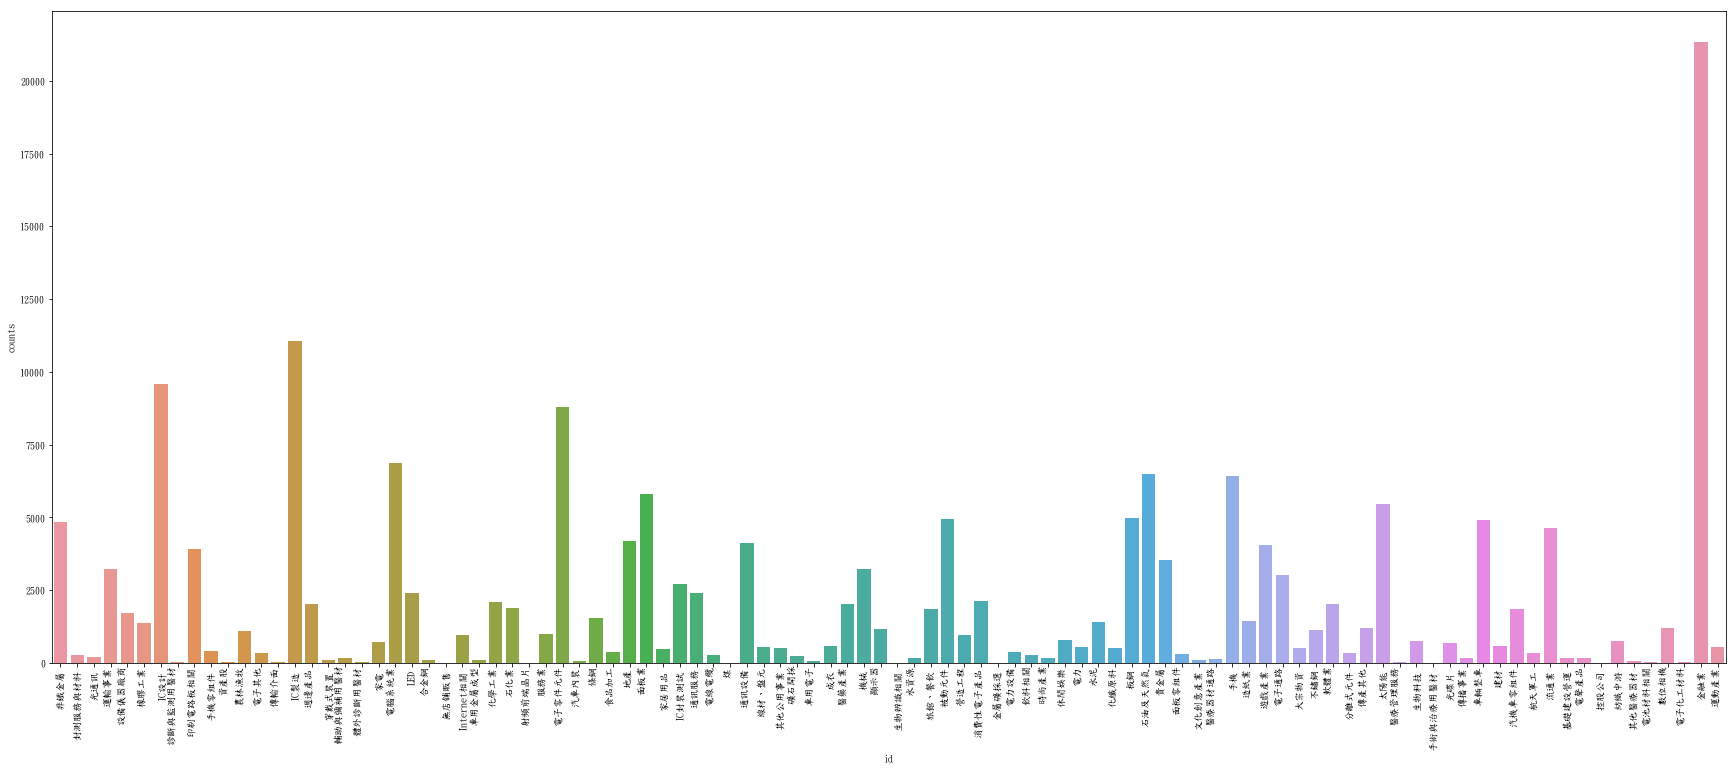

In [265]:
data=pd.DataFrame(list(d.items()),columns=["id","counts"])
fig=plt.figure(figsize=(30,12))
plt.xticks(rotation=90)
sns.barplot(x="id",y="counts",data=data,)
plt.savefig("img")

In [244]:
print("news with single industry:",data.sort_values(by="counts",ascending=False)["counts"].sum())

news with single industry: 189130


In [279]:
data.sort_values(by="counts",ascending=False).reset_index(drop=True)[75:]

,id,counts
75,基礎建設營運,164
76,電聲產品,157
77,水資源,152
78,醫療器材通路,131
79,合金鋼,116
80,文化創意產業,96
81,車用金屬成型,95
82,穿戴式裝置,87
83,其他醫療器材,67
84,汽車內裝,49


#### multi-label

In [280]:
x=dict()
for i in tqdm_notebook(maptocn):
    for j in i :
        if j not in x:x[j]=1
        else : x[j]+=1

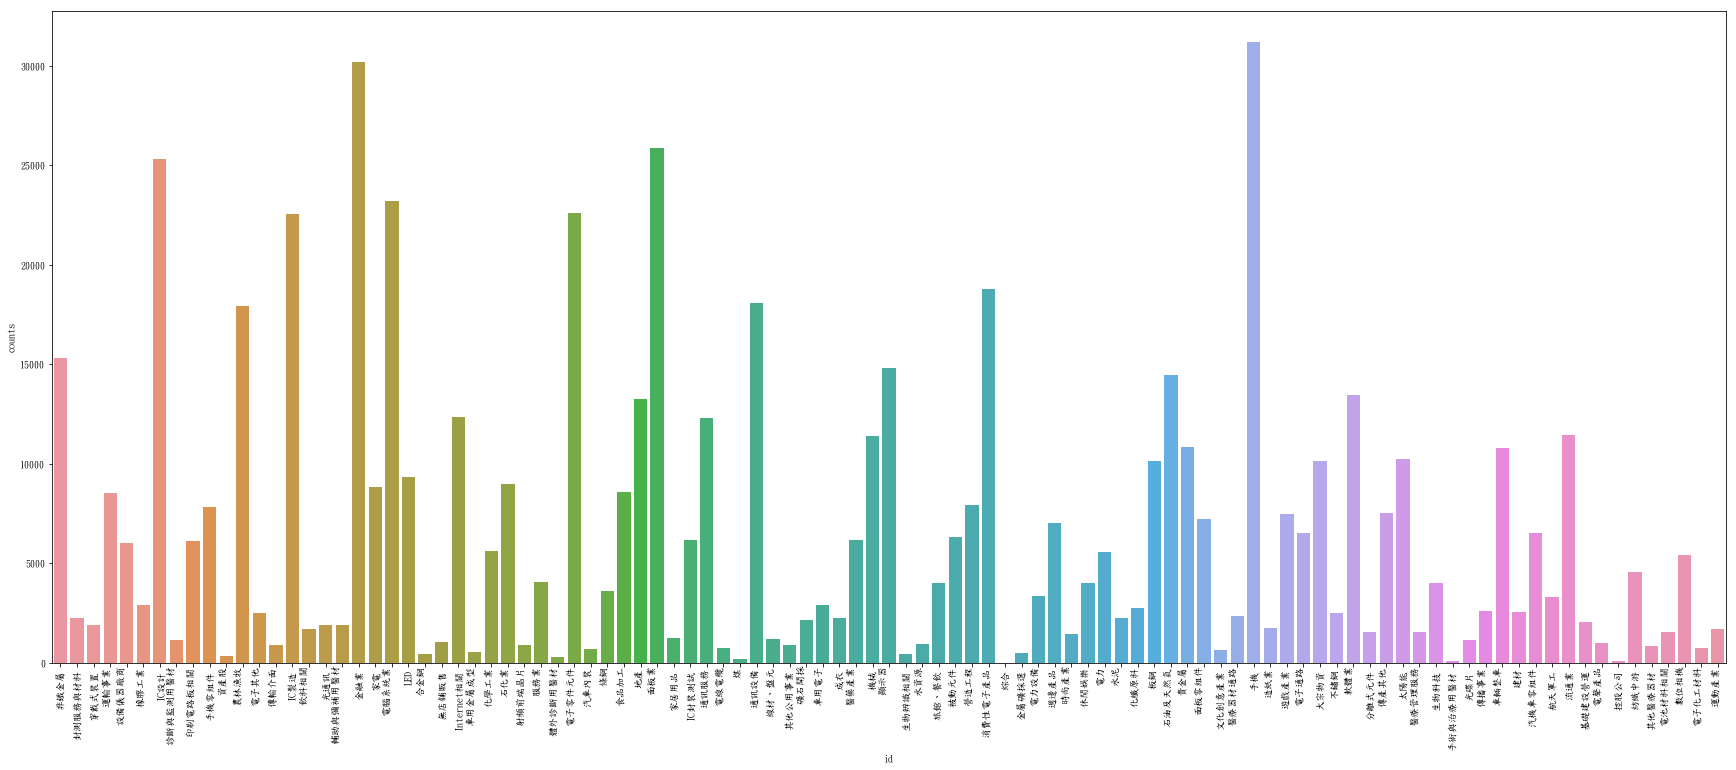

In [281]:
data=pd.DataFrame(list(x.items()),columns=["id","counts"])
fig=plt.figure(figsize=(30,12))
plt.xticks(rotation=90)
sns.barplot(x="id",y="counts",data=data,)
plt.savefig("img")

In [288]:
data.sort_values(by="counts",ascending=False).reset_index(drop=True)[75:]

,id,counts
75,時尚產業,1444
76,家居用品,1255
77,線材、盤元,1184
78,光碟片,1163
79,診斷與監測用醫材,1126
80,無店舖販售,1031
81,電聲產品,1002
82,水資源,926
83,射頻前端晶片,919
84,其他公用事業,894


#### Combine the less industry

In [259]:
data=data.sort_values(by="counts",ascending=False)
data.reset_index(drop=True)[:50]

,id,counts
0,金融業,21346
1,IC製造,11049
2,IC設計,9570
3,電子零件元件,8800
4,電腦系統業,6862
5,石油及天然氣,6482
6,手機,6422
7,面板業,5792
8,太陽能,5465
9,板鋼,4978


In [257]:
news_vip_v03_sorted[maptocn.progress_apply(lambda x :("生物辨識相關" in x) and len(x)==1 )]["guid"]

76642    531864cc-fef0-46f7-b7f5-92a71addf47c
Name: guid, dtype: object

In [296]:
news_vip_v03_sorted[maptocn.progress_apply(lambda x :("文化創意產業" in x) and len(x)==1 )]["guid"]

499       dc02ae50-32ab-49f6-adc7-d893195533b5
1887      8e7386ce-64fe-471e-96ef-48e564a9ea7b
2704      17083724-8b9e-4bf4-ae1c-288afc227cb1
3055      fda2d17b-f115-4a36-9954-25b43d77b725
3155      0148e000-7df1-4918-aeb9-9d3da240edc7
3713      1024d4cb-5cd7-4a33-b3e8-186bd0d43f5c
3811      ca3f5803-9b9f-414a-b187-4331ac40adf1
4281      53a66f2d-0a2b-4b39-b248-9951c4275a60
4824      e7f31907-cf69-4591-a60c-b8650e30bca8
6153      a0bc4703-715c-4faf-a404-165ce0b3dfdf
8439      b225ad9c-9c1c-4b96-a2b3-ccba07c88ed6
9582      d8862da8-0784-4f8a-ac5e-6962dfc8e943
9705      66e9b077-80eb-49d2-8749-7ebfa2b80f20
10100     e172d11c-1731-4d80-a8f9-e1020920fdf1
11217     3de8ff31-2617-482c-b04a-018e12643dba
12215     64d56870-6f3f-498f-a9f4-266c6827f91f
12304     4cd946aa-815f-45ff-9540-e3f9b1807de2
13935     a1d7a9e3-a408-48a2-8f73-1f601e2a6057
18169     f112b135-19d8-45fd-bd9b-1a362d5ccf18
19302     3b68bf2c-30f6-4bc5-9082-45e652bc8a83
20198     60a100bb-1bf4-4ba2-83df-b65e4cfe53b0
21522     ce2